# 9. Conditional expectation

## Brief summary

### Conditional expectation given an event

Let $A$ be an event with positive probability. If $Y$ is a discrete r.v., then the *conditional expectation of* $Y$ *given* $A$ is 

\begin{equation}
E(Y|A) = \sum_y yP(Y=y|A),
\end{equation}

where the sum is over the support of $Y$. If $Y$ is a continuous r.v. with PDF $f$, then 

\begin{equation}
E(Y|A) = \int_{-\infty}^{\infty} yf(y|A)dy,
\end{equation}

where the conditional PDF $f(y|A)$ is defined as the derivative of the conditional CDF $F(y|A) = P(Y \leq y|A)$, and can also be computed by a hybrid version of Bayes' rule:

\begin{equation}
f(y|A) = \frac{P(A|Y=y)f(y)} {P(A)}.
\end{equation}

### Law of total expectation

Let $A_1, ..., A_n$ be a partition of a sample space, with $P(A_i) > 0$ for all $i$, and let $Y$ be a random variable on this sample space. Then

\begin{equation}
E(Y) = \sum_{i=1}^n E(Y|A_i)P(A_i).
\end{equation}

### Conditional expectation given a r.v.

Let $g(x) = E(Y|X=x)$. Then the *conditional expectation of* $Y$ *given* $X$, denoted $E(Y|X)$, is defined to be the random variable $g(X)$. In other words, if after doing the experiment $X$ crystallizes into $x$, then $E(Y|X)$ crystallizes into $g(x)$.

### Properties of conditional expectation

#### Dropping what's independent

If $X$ and $Y$ are independent, then $E(Y|X) = E(Y)$.

#### Taking out what's known

For any function $h$, 

\begin{equation}
E(h(X)Y|X) = h(X)E(Y|X).
\end{equation}


### Adam's law

For any r.v.s $X$ and $Y$,

\begin{equation}
E(E(Y|X)) = E(Y).
\end{equation}

#### Adam's law with extra conditioning

For any r.v.s $X, Y, Z$, we have

\begin{equation}
E(E(Y|X,Z)|Z) = E(Y|Z)
\end{equation}

#### Projection interpretation

For any function $h$, the r.v. $Y-E(Y|X)$ is uncorrelated with $h(X)$. Equivalently,

\begin{equation}
E((Y-E(Y|X))h(X)) = 0.
\end{equation}

(This is equivalent since $E(Y-E(Y|X)) = 0$, by linearity and Adam's law.)


### Conditional variance

The *conditional variance of* $Y$ *given* $X$ is

\begin{equation}
Var(Y|X) = E((Y-E(Y|X))^2|X).
\end{equation}

This is equivalent to

\begin{equation}
Var(Y|X) = E(Y^2|X) - (E(Y|X))^2.
\end{equation}


### Eve's law 

For any r.v.s $X$ and $Y$,

\begin{equation}
Var(Y) = E(Var(Y|X)) + Var(E(Y|X)).
\end{equation}


## Python examples



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm
from numpy.random import choice

%matplotlib inline
%load_ext autoreload
%autoreload 2

### Mystery prize simulation

You are approached by another stranger, who gives you an opportunity to bid on a mystery box containing a mystery prize! The value of the prize is completely unknown, except that it is worth at least nothing, and at most a million dollars. So the true value $V$ of the prize is considered to be Uniform on $[0, 1]$ (measured in millions of dollars).

You can choose to bid any amount $b$ (in millions of dollars). You have the chance to get the prize for considerably less than it is worth, but you could also lose money if you bid too much. Specifically, if $b < 2V/3$, then the bid is rejected and nothing is gained or lost. If $b \geq 2V/3$, then the bid is accepted and your net payoff is $V-b$ (since you pay $b$ to get a prize worth $V$). What is your optimal bid $b$, to maximize the expected payoff?

*Solution:*
Your bid $b \geq 0$ must be a predetermined constant (not based on $V$, since $V$ is unknown). To find the expected payoff $W$, condition on whether the bid is accepted. The payoff is $V-b$ if the bid is accepted and $0$ is the bid is rejected. So

\begin{equation}
E(W) = E(W|b \geq 2V/3)P(b \geq 2V/3) + E(W|b < 2V/3)P(b < 2V/3) \\
= E(V-b|b \geq 2V/3)P(b \geq 2V/3) + 0 \\
= (E(V|V \leq 3b/2) - b)P(V \leq 3b/2) \\
= (3b/4-b)(3b/2) = -3b^2/8.
\end{equation}

The above expression is negative except at $b=0$, so the optimal bid is $0$: you shouldn't play this game!

In [2]:
# First choose a bid b (we chose 0.6)
b = 0.6
# then simulate a large number of hypothetical mystery prizes and store them in V
num_trials = 10**5
V = uniform.rvs(size=num_trials)

In [3]:
# Get the average profit conditional on an accepted bid
print(np.mean(V[b > (2/3.)*V]) - b)   # this should be negative regardless of b

-0.150159848977


### Time until HH vs. HT

You toss a fair coin repeatedly. What is the expected number of tosses until the pattern *HT* appears for the first time? What about the expected number of tosses until *HH* appears for the first time?

*Solution:*
Let $W_{HT}$ be the number of tosses until *HT* appears. $W_{HT}$ is the waiting time for the first Heads, which we'll call $W_1$, plus the additional waiting time for the first Tails after the first Heads, which we'll call $W_2$. By the story of the First Success distribution, $W_1$ and $W_2$ are i.i.d. $FS(1/2)$, so $E(W_1) = E(W_2) = 2$ and $E(W_{HT})=4$.

Finding the expected waiting time for *HH*, is more complicated. We can't apply the same logic as for $E(W_{HT})$: if the first Heads is immediately followed by Tails, our progress is destroyed and we must start from scratch. But this is progress for us in solving the problem, since the fact that the system can get reset suggests the strategy of first-step analysis. Let's condition on the outcome of the first toss:

\begin{equation}
E(W_{HH}) = E(W_{HH}|\text{first toss H})\frac{1}{2} + E(W_{HH}|\text{first toss T})\frac{1}{2} \\
= \big(2 \cdot \frac{1}{2} + (2 + E(W_{HH})) \cdot \frac{1}{2}\big)\frac{1}{2} + (1 + E(W_{HH})) \frac{1}{2} \\
= 6.
\end{equation}

In [4]:
print(''.join(np.random.choice(['H', 'T'], size=100, replace=True)))

THHTHHHTHTTHTHHHTHHHHTTHHTHTHTHTTHTHHHTTTHHTHHHHTTHTHHHHHHTHHHTHTHTTHHHHTHTHHTHTTTHHTHHHHTTHHTHHTHHH


In [5]:
R = []
num_trials = 10**3
for i in range(num_trials):
    R.append(''.join(np.random.choice(['H', 'T'], size=100, replace=True)))

In [6]:
# Locate 'HH' in strings
T = [s.find('HH') for s in R]
print(np.mean(T) + len('HH'))   # ending position

5.792


In [7]:
# Locate 'HT' in strings
T = [s.find('HT') for s in R]
print(np.mean(T) + len('HT'))   # ending position

3.873


### Linear regression

An extremely widely used method for data analysis in statistics is *linear regression*. In its most basic form, the linear regression model uses a single explanatory variable $X$ to predict a response variable $Y$, and it assumes that the conditional expectation of $Y$ is *linear* in $X$:

\begin{equation}
E(Y|X) = a + bX.
\end{equation}

(a) An equivalent way to express this is to write

\begin{equation}
Y = a + bX + \epsilon,
\end{equation}

where $\epsilon$ is a r.v. (called the *error*) with $E(\epsilon|X) = 0$.

(b) Solving for the constants $a$ and $b$ in terms of $E(X)$, $E(Y)$, $Cov(X,Y)$, and $Var(X)$, we get 

\begin{equation}
b = \frac{Cov(X,Y)}{Var(X)}, \\
a = E(Y) - bE(X) = E(Y) - \frac{Cov(X, Y)}{Var(X)} \cdot E(X).
\end{equation}


In [8]:
X = norm.rvs(size=100)   # realizations of r.v. X ~ N(0, 1)
Y = 3 + 5*X + norm.rvs(size=100)   # realizations of r.v. Y = a + bX + eps, where eps ~ N(0, 1)

In [9]:
b = np.cov([X, Y], rowvar=True)[0, 1] / np.var(X)
print(b)
a = np.mean(Y) - b*np.mean(X)
print(a)

5.09101651987
2.99969215134


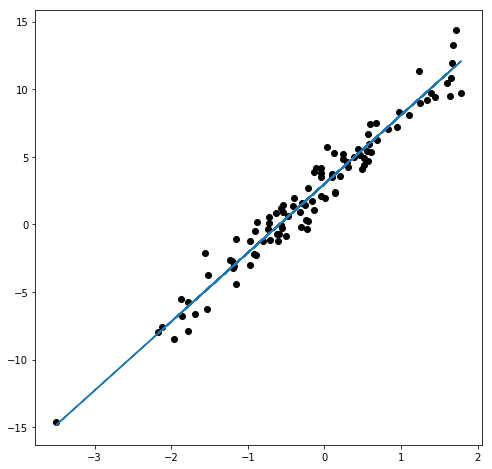

In [10]:
plt.figure(figsize=(8, 8))
_ = plt.scatter(X, Y, marker='o', color='black')
_ = plt.plot(X, a + b*X)